# Predicting a Film's IMDb Rating via Regression and Deep Learning

![classiques](images/classics.jpg)

## Author: [Patricio Contreras](https://www.linkedin.com/in/pcontreras97/)

## Overview

This project is concerned with predicting a film's IMDb rating (0-10) given a select number of features.  We'll first read in the movie dataset and perform some exploratory data analysis (EDA).  After we have a solid understanding of the data, we'll clean it up and prepare it for the modelling stage.  Two models will be created for this project: a multiple linear regression model and a neural network.  The goal is to evaluate the performance of each and see which one ultimately predicts IMDb rating the best!

## 1. Business Understanding

Producing a film is by no means an easy endeavour.  Everyone in charged of producing a new film must take into account many different variables (e.g., genre, time of year, certification) in order to minimise the risk of making a dreaded "razzie".  Besides revenue and profit made, one metric used by many to evaluate the success of a film is the IMDb rating.

The goal of this project is to take into account several movie features (release date, language, etc.) and predict what the eventual IMDb rating will be.  By the end of this project, the model chosen should help movie producers make informed, data-driven decisions to maximise success.

## 2. Data Understanding

Now that we've defined the goal and purpose of this project, let's dive into exploring the data.  This step is responsible with gaining a good understanding of the data we'll be using and identifying issues to clean up later.  By the end of this section, we should have a good idea of what fixes we need to make to supply clean and relevant data to our models.

In [1]:
# import necessary Python libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

The data used for this project was taken from Kaggle's [The Movies Dataset](https://www.kaggle.com/rounakbanik/the-movies-dataset) page.  It is located in the [data](data) folder as "archive":

In [2]:
# reading in the main movie csv
df = pd.read_csv("data/archive/movies_metadata.csv")

# dimensions of df
print("Number of rows:", df.shape[0])
print("Number of columns:", df.shape[1])

# preview of df
df.head()

Number of rows: 45466
Number of columns: 24


,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


As seen by the output above, each row represents one movie and the columns represent movie features.  There are 45,466 rows in this DataFrame and 24 columns that describe each movie.  There are features that are commonly used to describe a movie such as `genres`, `release_date`, and `revenue`, but there are also less common features such as `belongs_to_collection` and `homepage` that also describe the film.

In order to understand our features better, a data dictionary is shown below:

1. **adult** - is this an adult film?
2. **belongs_to_collection** - is this film part of a franchise?
3. **budget** - the budget to make the film
4. **genres** - the most popular genres associated with this film
5. **homepage** - website for the film
6. **id** - The Movie Database (TMDb) ID for this film
7. **imdb_id** - the IMDb ID for this film
8. **original_language** - the language spoken in the first version of this film
9. **original_title** - the title used for this film in the first version
10. **overview** - the film synopsis
11. **popularity** - TMDb popularity score for the film.  To read more about how this was calculated, click [here](https://developers.themoviedb.org/3/getting-started/popularity)
12. **poster_path** - path to a jpg of the film poster
13. **production_companies** - the production company for the film
14. **production_countries** - where was the film produced?
15. **release_date** - the date the movie was released
16. **revenue** - box office revenue for the film
17. **runtime** - film runtime in minutes
18. **spoken_languages** - languages spoken in the film
19. **status** - what is the status of the film?
20. **tagline** - famous tagline associated with the film
21. **title** - most popular title for the film
22. **video** - unknown
23. **vote_average** - IMDb rating for the film.  To learn more about how this was computed, click [here](https://help.imdb.com/article/imdb/track-movies-tv/weighted-average-ratings/GWT2DSBYVT2F25SK#)
24. **vote_count** - how many people rated this film on IMDb

### Check Column Data Types

Let's keep on exploring our DataFrame by outputting the data type stored in each column:

In [3]:
# data type of each column
df.dtypes

adult                     object
belongs_to_collection     object
budget                    object
genres                    object
homepage                  object
id                        object
imdb_id                   object
original_language         object
original_title            object
overview                  object
popularity                object
poster_path               object
production_companies      object
production_countries      object
release_date              object
revenue                  float64
runtime                  float64
spoken_languages          object
status                    object
tagline                   object
title                     object
video                     object
vote_average             float64
vote_count               float64
dtype: object

The overwhelming majority of columns in this DataFrame are of type `object` and only 4 are numeric.  While some of the data types _do_ make sense (e.g., `title` - object, `overview` - object, `vote_average` - float64), others will probably have to be changed to use in our models (`budget` to numeric type).

### Check for Duplicates

Checking for duplicates is a crucial step while investigating a DataFrame.  Having duplicates is generally problematic as we have redundant data and this could potentially affect our results later on.  Given that the `id` and `imdb_id` columns *should* be unique identifiers per film, we'll use these features to check if there are duplicates in our DataFrame `df`:

In [4]:
# how many duplicates are there?
df.duplicated(subset = ["id", "imdb_id"]).sum()

30

It seems like there are 30 duplicates in `df`.  Since this is something that will most likely create issues later, let's get rid of them now.  (We'll also display the dimensions of `df` after removing the duplicates):

In [5]:
# removing duplicates from df
df = df[~df.duplicated(subset = ["id", "imdb_id"])]

# dimensions of df after
print("Number of rows:", df.shape[0])
print("Number of columns:", df.shape[1])

Number of rows: 45436
Number of columns: 24


As expected, we now have 30 less rows than before.  Great, we should be clear of this issue.

### Check Missing Values

Another common step when exploring a DataFrame is to investigate how many missing values are present.  This will affect our results further down the line and should be dealt with in the early stages:

In [6]:
# percent of missing values per column
round((df.isna().sum()/len(df))*100, 2)

adult                     0.00
belongs_to_collection    90.12
budget                    0.00
genres                    0.00
homepage                 82.88
id                        0.00
imdb_id                   0.04
original_language         0.02
original_title            0.00
overview                  2.10
popularity                0.01
poster_path               0.85
production_companies      0.01
production_countries      0.01
release_date              0.19
revenue                   0.01
runtime                   0.58
spoken_languages          0.01
status                    0.19
tagline                  55.10
title                     0.01
video                     0.01
vote_average              0.01
vote_count                0.01
dtype: float64

Three columns stand out here: `belongs_to_collection`, `homepage`, and `tagline`.  These columns have over half of their values missing!  While some columns won't be very useful for our modelling stage (e.g., `video`, `poster_path`, `homepage`, etc.), other columns with missing values will have to be dealt with later on.

## 3. Exploratory Data Analysis

Now that we've dealt with duplicates and know how many missing values exist per column, let's keep on exploring our data through exploratory data analysis!  This can be done through several different methods but I decided to split this section into two: numeric features and categorical features.

### Visualising Numeric Data

Histograms are a great way to inspect the frequency distribution of a variable and get some insight on important descriptive statistics such as mean, median, and mode.  The shape of the distribution (modality, skewness/symmetry) is also another important takeaway from these plots.

Alongisde the histograms, I'll also be plotting boxplots to more clearly visualise the outliers in these variables.  While a histogram does a great job at showing the frequency distribution, it can sometimes fail at showing outliers due to very small frequencies:

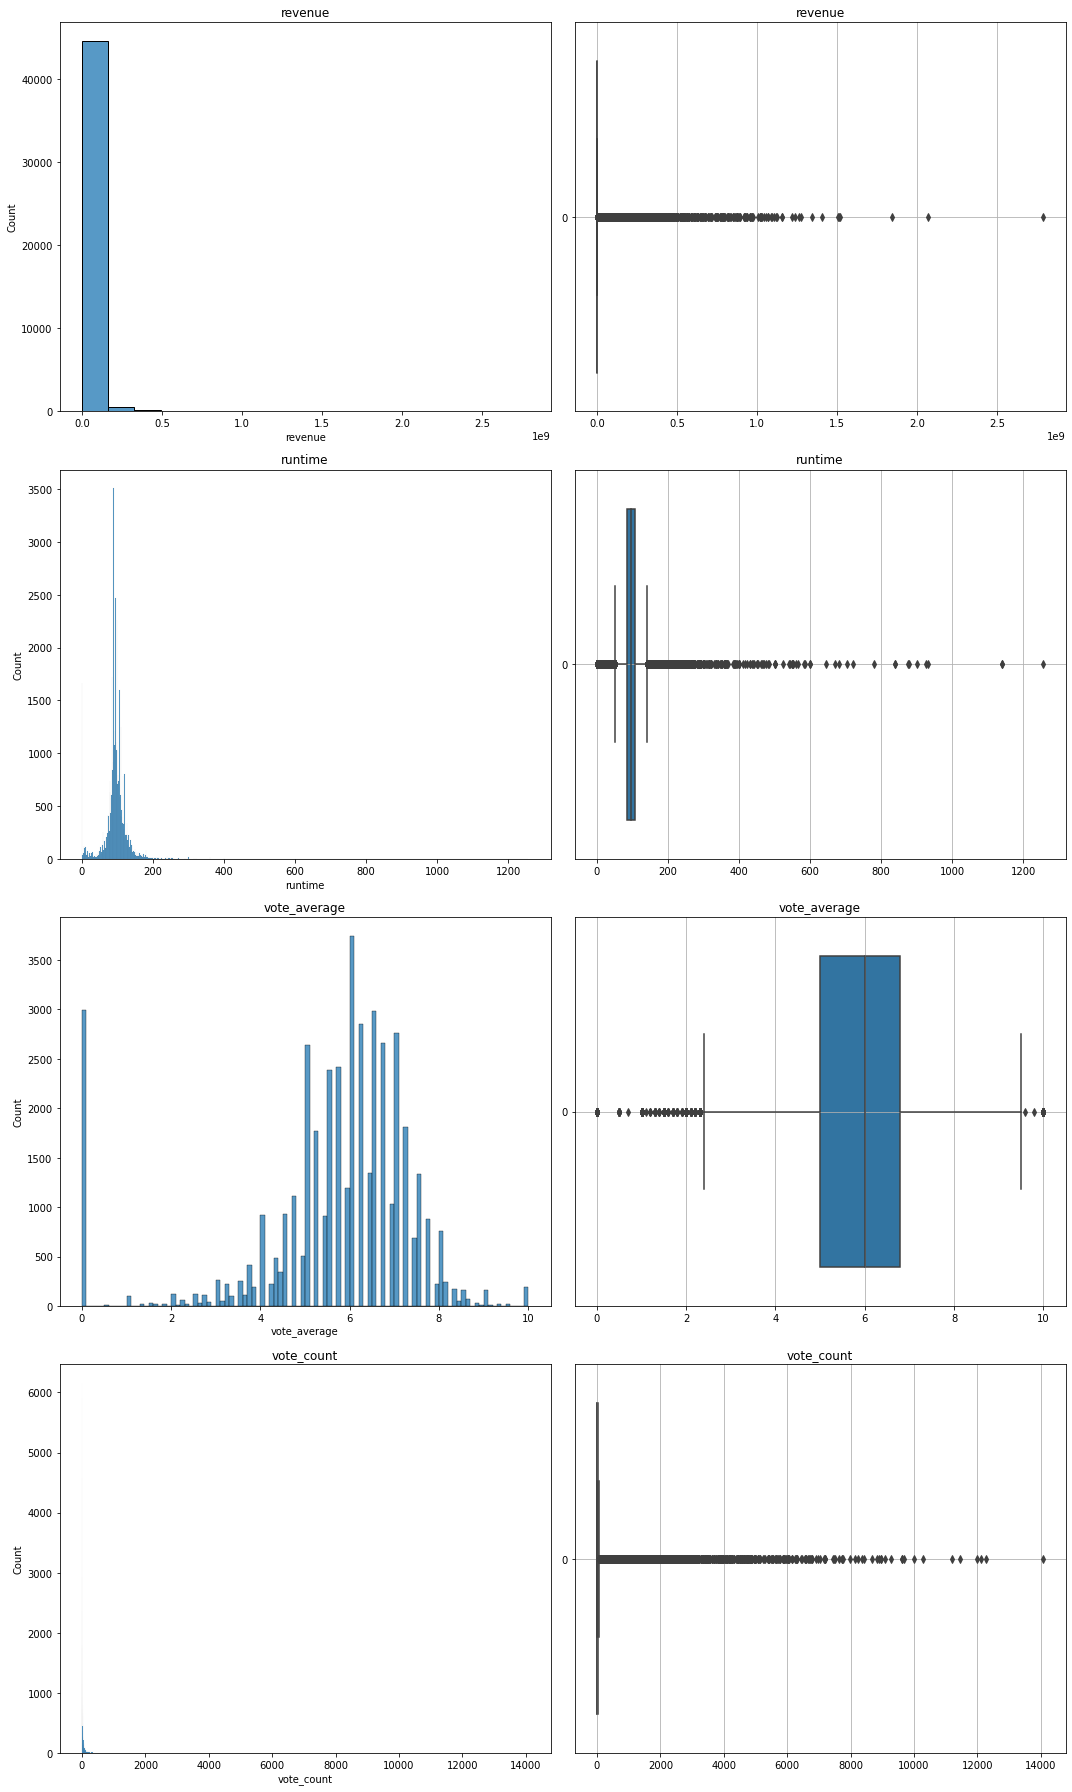

In [7]:
from Code import eda
fig, axes = plt.subplots(4, 2, figsize = (15,25))
eda.plot_numeric(df, fig, axes)

The main takeaways from these plots are as follows:

* The histogram for `revenue` suggests that most films in `df` don't make a revenue over 500 million (given the positive skewness of the distribution).  However, the boxplot raises a concern as it seems every point above 0.0 is considered an "outlier".  This is worrisome since this could mean that several films have a value of 0 for `revenue`!

* `runtime` appears to have a positively skewed distribution, however, there is a concentration of data around the 100 minute mark.  The histogram shows that most films have a runtime of less than 200 minutes (3.33 hours) whereas the boxplot reveals that some films in the dataset are as long as 20 hours!

* `vote_average` seems to be the feature with the least amount of skewness.  The frequency distribution appears to be unimodal with the majority of films in the dataset having an IMDb rating of around 6.2.  Around 3,000 films have a rating close to 0, however, the boxplot labels these as outliers.

* Unfortunately the frequency distribution for `vote_count` is barely visible due to the large frequency imbalance present.  As the histogram shows, most films have a very small `vote_count` and all other counts were labelled as "outliers" according to the boxplot - very strong skewness!

### Exploring our Categorical Data

20 out of the 24 features present in our DataFrame are of type `object`.  This means that unfortunately we cannot display distributions nor boxplots due to their non-numeric nature.  In this section we'll output the top 5 most and least common values per feature to get an idea of what we're working with:

In [8]:
# extracting non-numeric columns
df_object = df.select_dtypes(include = object)
# top 5 values per non-numeric column
for f in df_object.columns:
    print("FEATURE:", f)
    print(df_object[f].value_counts(normalize = True).head())
    print("------------------------")

FEATURE: adult
False                                                                                                                             0.999736
True                                                                                                                              0.000198
 Avalanche Sharks tells the story of a bikini contest that turns into a horrifying affair when it is hit by a shark avalanche.    0.000022
 Rune Balot goes to a casino connected to the October corporation to try to wrap up her case once and for all.                    0.000022
 - Written by Ørnås                                                                                                               0.000022
Name: adult, dtype: float64
------------------------
FEATURE: belongs_to_collection
{'id': 415931, 'name': 'The Bowery Boys', 'poster_path': '/q6sA4bzMT9cK7EEmXYwt7PNrL5h.jpg', 'backdrop_path': '/foe3kuiJmg5AklhtD3skWbaTMf2.jpg'}                 0.006457
{'id': 421566, 'name': 'Totò Collec

In [9]:
# top 5 least common values per non-numeric column
for f in df_object.columns:
    print("FEATURE:", f)
    print(df_object[f].value_counts(ascending = True, normalize = True).head())
    print("------------------------")

FEATURE: adult
 Avalanche Sharks tells the story of a bikini contest that turns into a horrifying affair when it is hit by a shark avalanche.    0.000022
 Rune Balot goes to a casino connected to the October corporation to try to wrap up her case once and for all.                    0.000022
 - Written by Ørnås                                                                                                               0.000022
True                                                                                                                              0.000198
False                                                                                                                             0.999736
Name: adult, dtype: float64
------------------------
FEATURE: belongs_to_collection
{'id': 397341, 'name': "Don't Go Breaking My Heart Collection", 'poster_path': None, 'backdrop_path': None}                                                   0.000223
{'id': 402074, 'name': 'Annabelle Colle

The output shown above reveals a lot of information from these features.  **Keeping in mind that some features have a substantial amount of missing values**, the following should be noted:

* `budget` has 80% of its values set to 0!
* Drama is the most popular stand-alone genre in `df`
* Approximately 3 films have no associated `imdb_id`
* Features such as `genres`, `production_companies`, and `production_countries` have `[]` as a top 5 value
* Not all films in `df` have been released!

*As I mentioned before, some of these features need to be converted to their appropriate data type for best results*

---

### Initial Comments on the Raw Data

While our initial exploration of `df` allowed us to gain a better understanding of the data, there is still much to work on.  Adjustments and cleaning steps need to be performed before advancing onto our modelling stage.  The following are issues that will be addressed in the next section:

* remove unnecessary/irrelevant features from `df`

* change the data type for some categorical features

* ensure we're only working with movies (no TV shows, shorts, etc.)

* only look at films that have been _released_

* investigate `release_date`

* clean `runtime`

* fix missing values problem

While some of these fixes are standard across all data cleaning/prep stages (e.g., handling missing values), other fixes are particular to _this_ project (e.g., only working with movies).

## 4. Data Cleaning and Preparation

In this section we'll address all the points made above.  This stage of the project is crucial before advancing onto the modelling portion as it cleans and prepares the data for optimal and accurate results later on.

### Getting rid of Unnecessary Features

Before we clean and prepare our DataFrame, let's quickly get rid of columns that won't be necessary for our purposes.  Even though `df` came with multiple features per film, not all of them will have the same effect in predicting an IMDb rating.  For example, I doubt a film's `overview` or `poster_path` will have a large impact in our modelling steps later on.  Furthermore, there are some features that seem redundant and could raise some multicollinearity problems (e.g., `original_title` - `title`, `original_language` - `spoken_languages`):

In [10]:
# columns present in `df`
df.columns

Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count'],
      dtype='object')

In [11]:
# drop unnecessary columns
df.drop(["homepage", "original_title", "overview", "poster_path", 
         "spoken_languages", "tagline", "video"], axis = 1, inplace = True)

### Change Feature Data Type + Reformat

Let's ensure that the data in `df` is stored in its proper format.  This means changing the data type for some features (`budget` should be numeric) and/or reformatting certain features so working with them later on will be easier (`genres` should just be a single string instead of a complicated list with a dictionary)

As a quick refresher, here are the data types for each column as it stands:

In [12]:
# feature data types
df.dtypes

adult                     object
belongs_to_collection     object
budget                    object
genres                    object
id                        object
imdb_id                   object
original_language         object
popularity                object
production_companies      object
production_countries      object
release_date              object
revenue                  float64
runtime                  float64
status                    object
title                     object
vote_average             float64
vote_count               float64
dtype: object

The following changes will be made to the DataFrame in this section:

* change `adult` to be a binary feature (0 or 1)
* change `belongs_to_collection` to a single string
* change `budget` to numeric
* change `genres` from dictionary to single string
* change `id` to numeric
* change `popularity` to a numeric format
* change `production_companies` from dictionary to a single string
* change `production_countries` from dictionary to a single string
* change `release_date` to a datetime format
* change 0s in numeric columns to `NAs` (except `adult`)

In [13]:
# adult
# check column only has "True" and "False"
df["adult"].value_counts()

False                                                                                                                             45424
True                                                                                                                                  9
 Avalanche Sharks tells the story of a bikini contest that turns into a horrifying affair when it is hit by a shark avalanche.        1
 Rune Balot goes to a casino connected to the October corporation to try to wrap up her case once and for all.                        1
 - Written by Ørnås                                                                                                                   1
Name: adult, dtype: int64

`adult` has 3 entries that aren't `True` or `False`.  We'll get rid of them before converting this feature to a binary variable.  We'll also use `convert_stringList()` from `Code/data_cleaning.py` to convert `belongs_to_collection` from a dictionary to a string:

In [14]:
from Code import data_cleaning as dc
# removing non-boolean entries
df = df[((df["adult"] == "True") | (df["adult"] == "False"))]
# change `adult` to binary feature
df["adult"] = df["adult"].apply(lambda x: 1 if x == "True" else 0)
# rename feature
df.rename({"adult": "is_Adult"}, axis = 1, inplace = True)

# belongs_to_collection - change from dictionary to a single string
df["belongs_to_collection"] = df["belongs_to_collection"].apply(dc.convert_stringList)

# budget - change to numeric
try:
    df["budget"] = df["budget"].astype(float)
except:
    print("Cannot change budget to float.  Please check values!")

`genres`, `production_companies`, and `production_countries` are strings of dictionaries inside of lists.  This makes the job of extracting the primary genre/company/country a bit tricky.  In order to solve this issue, we'll also use the function `convert_stringList()` from `Code/data_cleaning.py`:

In [15]:
# genre - extract only primary genre
df["genres"] = df["genres"].apply(dc.convert_stringList)
# rename feature
df.rename({"genres": "genre"}, axis = 1, inplace = True)

# popularity - change to float
try:
    df["popularity"] = df["popularity"].astype(float)
except:
    print("Cannot change popularity to float.  Please check values!")

In [16]:
# id - change to numeric
try:
    df["id"] = df["id"].astype(int)
except:
    print("Cannot change id to float.  Please check values!")

In [17]:
# production_companies - change from dictionary to string
df["production_companies"] = df["production_companies"].apply(dc.convert_stringList)

# production_countries - change from dictionary to string
df["production_countries"] = df["production_countries"].apply(dc.convert_stringList)

# rename features
df.rename({"production_companies": "production_company",
          "production_countries": "production_country"}, axis = 1, inplace = True)

# release_date - change to datetime
try:
    df["release_date"] = pd.to_datetime(df["release_date"])
except:
    print("Could not change to datetime")

Now that we've changed the features to their correct data type, let's check out which ones turned out to be numeric:

In [18]:
df.dtypes

is_Adult                          int64
belongs_to_collection            object
budget                          float64
genre                            object
id                                int64
imdb_id                          object
original_language                object
popularity                      float64
production_company               object
production_country               object
release_date             datetime64[ns]
revenue                         float64
runtime                         float64
status                           object
title                            object
vote_average                    float64
vote_count                      float64
dtype: object

We'll replace the 0s in numeric columns with `NAs` (_except_ for `is_Adult`):

In [19]:
# replace 0s with NAs
df[df.columns[1:]] = df[df.columns[1:]].replace(0, np.nan)

Now that we've converted most of our features to their correct format and data type, let's see how `df` looks:

In [20]:
# dimensions of df
print("Number of rows:", df.shape[0])
print("Number of columns:", df.shape[1])

df.head()

Number of rows: 45433
Number of columns: 17


,is_Adult,belongs_to_collection,budget,genre,id,imdb_id,original_language,popularity,production_company,production_country,release_date,revenue,runtime,status,title,vote_average,vote_count
0,0,Toy Story Collection,30000000.0,Animation,862,tt0114709,en,21.946943,Pixar Animation Studios,United States of America,1995-10-30,373554033.0,81.0,Released,Toy Story,7.7,5415.0
1,0,NaN,65000000.0,Adventure,8844,tt0113497,en,17.015539,TriStar Pictures,United States of America,1995-12-15,262797249.0,104.0,Released,Jumanji,6.9,2413.0
2,0,Grumpy Old Men Collection,NaN,Romance,15602,tt0113228,en,11.712900,Warner Bros.,United States of America,1995-12-22,NaN,101.0,Released,Grumpier Old Men,6.5,92.0
3,0,NaN,16000000.0,Comedy,31357,tt0114885,en,3.859495,Twentieth Century Fox Film Corporation,United States of America,1995-12-22,81452156.0,127.0,Released,Waiting to Exhale,6.1,34.0
4,0,Father of the Bride Collection,NaN,Comedy,11862,tt0113041,en,8.387519,Sandollar Productions,United States of America,1995-02-10,76578911.0,106.0,Released,Father of the Bride Part II,5.7,173.0


### Filter `df` to Only Include Films

This project will only be predicting IMDb ratings for *films*.  Therefore, we must remove all other entries that do not fall under this category (TV shows, shorts, etc.)  To do this, I'll use the `title.basics.tsv.gz` dataset downloaded from [IMDb's website](https://www.imdb.com/interfaces/):

In [21]:
# import IMDb dataset
IMDb_basics = pd.read_csv("data/IMDb/title.basics.tsv.gz", sep = "\t")
# dimensions of dataset
print("Number of rows:", IMDb_basics.shape[0])
print("Number of columns:", IMDb_basics.shape[1])
# preview dataset
IMDb_basics.head()

Number of rows: 7783583
Number of columns: 9


,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short"
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,12,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short"


In [22]:
# left join df with IMDb basics on IMDb ID
df = dc.IMDb_update(df, IMDb_basics, "imdb_id", "tconst")

There are NAs present.  Please fix these columns

is_Adult                 0.000000
belongs_to_collection    0.901217
budget                   0.804547
genre                    0.053749
id                       0.000000
imdb_id                  0.000374
original_language        0.000242
popularity               0.001519
production_company       0.261286
production_country       0.138270
release_date             0.001915
revenue                  0.837167
runtime                  0.040015
status                   0.001849
title                    0.000066
vote_average             0.065987
vote_count               0.063808
titleType                0.001012
primaryTitle             0.001012
originalTitle            0.001012
isAdult                  0.001012
startYear                0.001012
endYear                  0.001012
runtimeMinutes           0.001012
genres                   0.001012
dtype: float64


Unfortunately, 0.1% of the entries in `df` were not paired with an entry in `IMDb_basics`.  We'll filter out `df` here to only include rows where `titleType` = "movie" and then take care of the missing values in a later section:

In [23]:
# remove rows with NAs in `titleType`
df = df[df["titleType"] == "movie"]
# drop unnecessary columns
df.drop(IMDb_basics.columns[2:], axis = 1, inplace = True)

# new dimensions of df
print("Number of rows:", df.shape[0])
print("Number of columns:", df.shape[1])

Number of rows: 39109
Number of columns: 18


### Removing Films that Haven't Been Released

For this project, we'll only be working with data on films that have already been released to the general public.  If a film has not been released to the public yet, then most people won't have a chance to rate the film!  This means no rumoured, planned, in-production, nor post-production films allowed:

In [24]:
# only keeping released films
df = df[df["status"] == "Released"]
# no need for this column anymore
df.drop("status", axis = 1, inplace = True)

print("Number of rows:", df.shape[0])
print("Number of columns:", df.shape[1])

Number of rows: 38727
Number of columns: 17


### Investigating `release_date`

Now that we've changed the data type of `release_date`, let's see how far back our DataFrame goes:

43105   1906-12-26
24777   1911-07-01
39643   1912-01-01
17711   1912-10-15
43061   1912-11-13
           ...    
42239   2017-10-27
44974   2017-11-03
44504   2017-11-17
42234   2017-11-30
44271   2017-12-27
Name: release_date, Length: 38676, dtype: datetime64[ns]


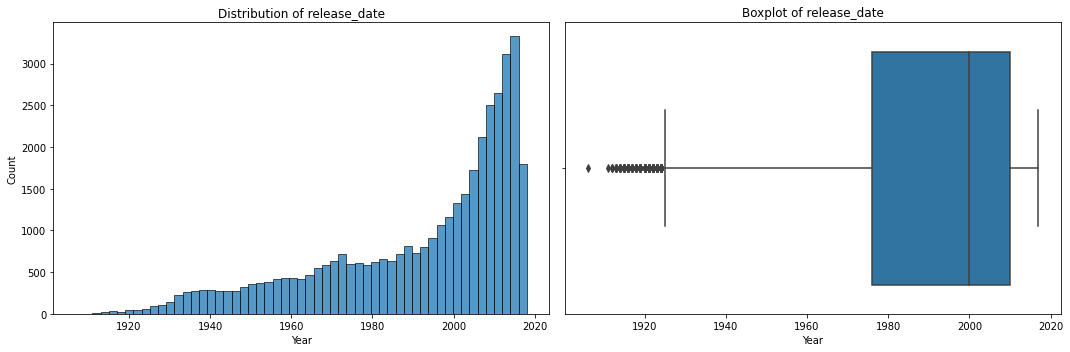

In [25]:
fig, axes = plt.subplots(1, 2, figsize = (15,5))

# distribution of `release_date` via histogram and boxplot
sns.histplot(df["release_date"], ax = axes[0])
axes[0].set_title("Distribution of release_date")
axes[0].set_xlabel("Year")

sns.boxplot(df["release_date"].dt.year.dropna(), ax = axes[1])
axes[1].set_title("Boxplot of release_date")
axes[1].set_xlabel("Year");

fig.tight_layout()
# sort column in ascending order
print(df["release_date"].dropna().sort_values())

The oldest film in `df` is from 1906!  Given the boxplot above, it seems that any film before 1930 is considered an outlier.  Furthermore, if we were to add a feature later on, getting information on older films will be harder than more recent films.  Therefore, we'll filter `df` to only include films from 1930 onwards:

In [26]:
# only films on or after 1930
df = df[df["release_date"] >= "1930"]

# new dimensions of df
print("Number of rows:", df.shape[0])
print("Number of columns:", df.shape[1])

Number of rows: 38214
Number of columns: 17


### Filtering `runtime`

Let's take a look at the distribution of `runtime` one more time:

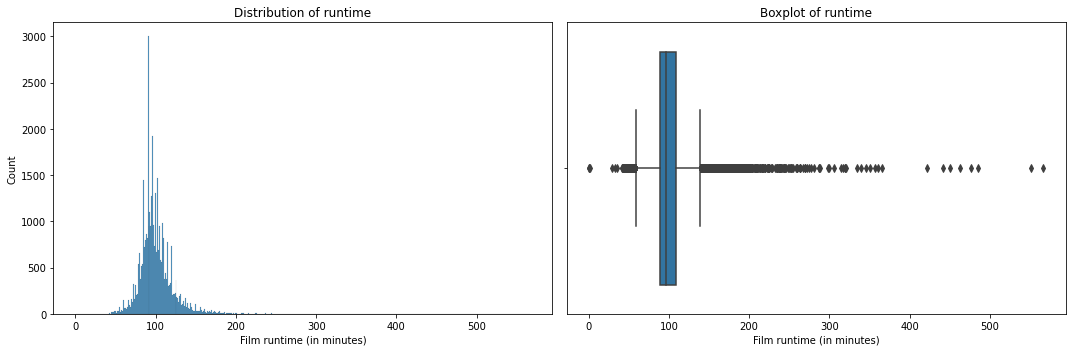

In [27]:
fig, axes = plt.subplots(1, 2, figsize = (15,5))

# distribution of `runtime` via histogram and boxplot
sns.histplot(df["runtime"], ax = axes[0])
axes[0].set_title("Distribution of runtime")
axes[0].set_xlabel("Film runtime (in minutes)")

sns.boxplot(df["runtime"].dropna(), ax = axes[1])
axes[1].set_title("Boxplot of runtime")
axes[1].set_xlabel("Film runtime (in minutes)");

fig.tight_layout()

The histogram and boxplot of `runtime` showed that the distribution was positively skewed and there are films with high `runtime` values.  For example, the boxplot reveals that some films have a `runtime` greater than 200 minutes (3.33 hours)!  For reference, **the theatrical release** of *The Lord of the Rings: The Return of the King* has a runtime of 3 hours and 21 minutes - and that's already considered a *long* film!

It seems that any film with a `runtime` greater than 150 minutes (2.5 hours) is already considered an outlier.  Given that most films *generally* don't have a runtime longer than this, we'll filter `df` to only include films with a `runtime` less than or equal to 150 minutes.  Furthermore, there are also films with a `runtime` less than 45 and are considered outliers.  We'll filter `df` to include films 45 minutes or longer.  This way our data is more representative of all the films being produced:

In [28]:
# ratio of data with `runtime` > 150 or < 45
sum((df["runtime"] > 150) | (df["runtime"] < 45)) / len(df)

0.02491233579316481

In [29]:
# only keeping films with 45 <= `runtime` <= 150
df = df[(45 <= df["runtime"]) & (df["runtime"] <= 150)]

print("Number of rows:", df.shape[0])
print("Number of columns:", df.shape[1])

Number of rows: 35855
Number of columns: 17


### Dealing with Missing Values

Now that we've reformatted our columns to the correct data type and filtered the data to include only released films from 1930 onwards, we're ready to deal with our dreaded `NAs`.  Here's a look at the percentage of missing values per column:

In [30]:
# percent of missing values per column
round((df.isna().sum()/len(df))*100, 2)

is_Adult                  0.00
belongs_to_collection    90.49
budget                   77.74
genre                     3.42
id                        0.00
imdb_id                   0.00
original_language         0.02
popularity                0.06
production_company       21.89
production_country       10.41
release_date              0.00
revenue                  80.47
runtime                   0.00
title                     0.00
vote_average              5.17
vote_count                4.99
titleType                 0.00
dtype: float64

In [31]:
# dimensions of df before web-scraping
df.reset_index(drop = True, inplace = True)
print(df.shape)
df.to_csv("data/df.csv")

(35855, 17)


#### `belongs_to_collection` - Web Scraping TMDb

Unfortunately, `belongs_to_collection` has a staggering 90% of its values missing.  This is an interesting feature to have as films belonging to a franchise could have an effect on the overall IMDb rating.  Given the nature of this variable, it wouldn't make sense to replace the `NAs` with random values or the mode.  Normally, a column with 90% of its values missing should be dropped, **however**, there is a possible solution.

A film's The Movie Database (TMDb) website lets us know if the film belongs to a franchise or not.  This is important because we can use web scraping tools to extract that information and fill our `NAs`.  Specifically, I used `Code/movie_scraping.py` to web scrape from TMDb's website and create a binary variable stored in `data/web_scrape/franchise.csv` (1 = part of a franchise, 0 = stand-alone film).

In this section, we'll simply read in the csv found in `data/web_scrape` and add it to `df`.  After that, we'll inspect how many missing values we have for this variable:

In [32]:
# read in csv containing information on franchise
franchise = pd.read_csv("data/web_scrape/franchise.csv")

df["belongs_to_collection"] = franchise["belongs_to_franchise"]
df.rename({"belongs_to_collection": "belongs_to_franchise"}, axis = 1, inplace = True)

# preview data
df.head()

,is_Adult,belongs_to_franchise,budget,genre,id,imdb_id,original_language,popularity,production_company,production_country,release_date,revenue,runtime,title,vote_average,vote_count,titleType
0,0,1.0,30000000.0,Animation,862,tt0114709,en,21.946943,Pixar Animation Studios,United States of America,1995-10-30,373554033.0,81.0,Toy Story,7.7,5415.0,movie
1,0,1.0,65000000.0,Adventure,8844,tt0113497,en,17.015539,TriStar Pictures,United States of America,1995-12-15,262797249.0,104.0,Jumanji,6.9,2413.0,movie
2,0,1.0,NaN,Romance,15602,tt0113228,en,11.712900,Warner Bros.,United States of America,1995-12-22,NaN,101.0,Grumpier Old Men,6.5,92.0,movie
3,0,0.0,16000000.0,Comedy,31357,tt0114885,en,3.859495,Twentieth Century Fox Film Corporation,United States of America,1995-12-22,81452156.0,127.0,Waiting to Exhale,6.1,34.0,movie
4,0,1.0,NaN,Comedy,11862,tt0113041,en,8.387519,Sandollar Productions,United States of America,1995-02-10,76578911.0,106.0,Father of the Bride Part II,5.7,173.0,movie


Now that we've added this column to `df`, let's see how many missing values came with it:

In [33]:
# ratio of missing values in our new column
df["belongs_to_franchise"].isna().sum() / len(df)

0.00047413192023427694

That's good news!  We went from 90% of our data missing to only 0.04%!  Let's drop the rows with missing data:

In [34]:
# remove rows
df = df.dropna(subset = ["belongs_to_franchise"])
# since belongs_to_franchise is binary, let's change its type to int
df["belongs_to_franchise"] = df["belongs_to_franchise"].astype(int)

#### `vote_average` and `vote_count` - Updating IMDb Ratings + Vote Counts

After taking a look at the IMDb website, I noticed that our DataFrame `df` is outdated.  For example, a film like *Jumanji* has an average rating of 6.9 and a vote count of 2,413 but the *Jumanji* (1995) [IMDb page](https://www.imdb.com/title/tt0113497/?ref_=nv_sr_srsg_6) currently (9-04-2021) shows a rating of 7.0 and a vote count of 312,578!  Seeing as `vote_average` is our variable of interest in this project, I believe it's a good idea to update it with more current values.

In order to do this, I downloaded the `title.ratings.tsv.gz` dataset from [IMDb](https://www.imdb.com/interfaces/).  This way, I can perform a left join between both DataFrames and then update the values.  *However*, before proceding with this, let's quickly check and see if `df` has unique IMDb IDs for each film:

In [35]:
# number of unique IMDb IDs
len(df["imdb_id"].unique()) == df.shape[0]

True

This means that the films with an IMDb ID of 0 (as seen in the EDA) were removed in the previous cleaning and filtering steps.

Let's update each film's `vote_average` and `vote_count` using IMDb's `title.ratings.tsv.gz` (found in the [data](data) folder):

In [36]:
# reading in IMDb ratings csv
IMDb_ratings = pd.read_csv("data/IMDb/title.ratings.tsv.gz", sep = "\t")

# update df with current ratings and vote counts
df = dc.IMDb_update(df, IMDb_ratings, "imdb_id", "tconst")

There are NAs present.  Please fix these columns

is_Adult                0.000000
belongs_to_franchise    0.000000
budget                  0.777276
genre                   0.034209
id                      0.000000
imdb_id                 0.000000
original_language       0.000167
popularity              0.000558
production_company      0.218790
production_country      0.103968
release_date            0.000000
revenue                 0.804621
runtime                 0.000000
title                   0.000000
vote_average            0.051705
vote_count              0.049863
titleType               0.000000
averageRating           0.000195
numVotes                0.000195
dtype: float64


Only 0.01% of films in `df` were not matched with a film in `title.ratings.tsv.gz`.  We'll just keep their current stats the way they are:

In [37]:
# values to fill NAs
values = {"averageRating": df["vote_average"][df["averageRating"].isna()],
         "numVotes": df["vote_count"][df["numVotes"].isna()]}
# fill NAs
df.fillna(values, inplace = True)
# drop `vote_average` and `vote_count` since we already have updated columns
# also get rid of `titleType` since all entries are films
df = df.drop(["vote_average", "vote_count", "titleType"], axis = 1)

# check to see if Jumanji's IMDb rating has changed
df[df["title"] == "Jumanji"]

,is_Adult,belongs_to_franchise,budget,genre,id,imdb_id,original_language,popularity,production_company,production_country,release_date,revenue,runtime,title,averageRating,numVotes
1,0,1,65000000.0,Adventure,8844,tt0113497,en,17.015539,TriStar Pictures,United States of America,1995-12-15,262797249.0,104.0,Jumanji,7.0,312530.0


Let's check and see if `averageRating` and `numVotes` still have `NAs`:

In [38]:
# number of missing values in updated columns
df[["averageRating", "numVotes"]].isna().sum()

averageRating    5
numVotes         5
dtype: int64

Since we're only dealing with 5 films out of thousands, we can just get rid of them:

In [39]:
# getting rid of rows with NAs in `averageRating` and `numVotes`
df.dropna(subset = ["averageRating", "numVotes"], inplace = True)

#### `genre`

Similar to `vote_average` and `vote_count`, IMDb has information on film genres in `title.basics.tsv.gz`.  We'll use this dataset to perform a left join and see if we can fill in the `NAs` present in `genre`:

In [40]:
# perform left join on "imdb_id" and "tconst"
df = dc.IMDb_update(df, IMDb_basics, "imdb_id", "tconst")

There are NAs present.  Please fix these columns

is_Adult                0.000000
belongs_to_franchise    0.000000
budget                  0.777272
genre                   0.034131
id                      0.000000
imdb_id                 0.000000
original_language       0.000167
popularity              0.000558
production_company      0.218709
production_country      0.103871
release_date            0.000000
revenue                 0.804594
runtime                 0.000000
title                   0.000000
averageRating           0.000000
numVotes                0.000000
titleType               0.000000
primaryTitle            0.000000
originalTitle           0.000000
isAdult                 0.000000
startYear               0.000000
endYear                 0.000000
runtimeMinutes          0.000000
genres                  0.000000
dtype: float64


Fortunately, all entries in `df` were matched with an entry in `IMDb_basics`!  We'll fill the missing values in `genre` with the values found in IMDb's `genres`:

In [41]:
# drop columns from IMDb table
df = df.drop(["titleType", "primaryTitle", "originalTitle",
             "isAdult", "startYear", "endYear", "runtimeMinutes"], axis = 1)

# extract only primary genre from IMDb genres
genres = df.loc[df["genre"].isna(), "genres"].apply(dc.genre_separator)

# fill NAs with IMDb genres
df.fillna({"genre": genres}, inplace = True)

# drop IMDb's genres
df = df.drop("genres", axis = 1)

print("There is/are now", df["genre"].isna().sum(), "missing genre(s).")

There is/are now 0 missing genre(s).


We now have 0 missing values!  Let's check out what other columns have missing values:

In [42]:
# ratio of missing values to number of films per column
df.isna().sum() / len(df)

is_Adult                0.000000
belongs_to_franchise    0.000000
budget                  0.777272
genre                   0.000000
id                      0.000000
imdb_id                 0.000000
original_language       0.000167
popularity              0.000558
production_company      0.218709
production_country      0.103871
release_date            0.000000
revenue                 0.804594
runtime                 0.000000
title                   0.000000
averageRating           0.000000
numVotes                0.000000
dtype: float64

#### `popularity` and `original_language`

Fortunately, these two features don't have a lot missing values.  To speed up the cleaning, we'll just get rid of these rows:

In [43]:
# drop rows with NAs in both columns
df.dropna(subset = ["original_language", "popularity"], inplace = True)

#### `production_company` vs `production_country` -  Web Scraping IMDb

With the exception of `budget` and `revenue`, the remaining two columns with missing values are `production_company` and `production_country`.  Both columns have over 10% of their values missing and simply removing the rows from `df` would mean that we lose a lot of data.  Furthermore, keeping both columns in the DataFrame seems redundant given that both variables describe where the film was produced.

When it comes between these variables, people generally tend to give more importance to the production _company_ rather than the country.  Production companies such as Paramount, MGM, Warner, and Disney are considered to be among the "elite" and people expect good films out of them!  Therefore, I'll keep `production_company` instead of `production_country`.  It'll be interesting to see and measure the effect these companies have on IMDb rating over other lesser-known production companies.

After web scraping IMDb for the necessary information, I stored my results in `data/web_scrape/prod_companies.csv`.  The following is just adding the variable back to `df`:

In [44]:
# drop both columns - will use data from prod_companies.csv instead
df.drop(["production_company", "production_country"], axis = 1, inplace = True)

# read in web-scraped data
prod_companies = pd.read_csv("data/web_scrape/prod_companies.csv")

df = pd.merge(df, prod_companies, how = "left", on = "imdb_id")
# preview of DataFrame
df.head()

,is_Adult,belongs_to_franchise,budget,genre,id,imdb_id,original_language,popularity,release_date,revenue,runtime,title,averageRating,numVotes,production_company
0,0,1,30000000.0,Animation,862,tt0114709,en,21.946943,1995-10-30,373554033.0,81.0,Toy Story,8.3,897995.0,Walt Disney Pictures
1,0,1,65000000.0,Adventure,8844,tt0113497,en,17.015539,1995-12-15,262797249.0,104.0,Jumanji,7.0,312530.0,TriStar Pictures
2,0,1,NaN,Romance,15602,tt0113228,en,11.712900,1995-12-22,NaN,101.0,Grumpier Old Men,6.7,24475.0,Lancaster Gate
3,0,0,16000000.0,Comedy,31357,tt0114885,en,3.859495,1995-12-22,81452156.0,127.0,Waiting to Exhale,6.0,9701.0,Twentieth Century Fox
4,0,1,NaN,Comedy,11862,tt0113041,en,8.387519,1995-02-10,76578911.0,106.0,Father of the Bride Part II,6.1,34926.0,Sandollar Productions


Let's check how many missing values we have in this column now:

In [45]:
# ratio of missing values in new `production_company`
df["production_company"].isna().sum() / len(df)

0.027452732705895495

Web-scraping to the rescue - as was the case with `belongs_to_collection` we went from having a significant amount of missing data (21.9%) to only 2.7%!

We'll get rid of the rows with missing values in this column:

In [46]:
# drop rows with missing values
df = df.dropna(subset = ["production_company"])

#### `budget` and `revenue`

Let's take a look at the percent of missing values in these columns once again:

In [47]:
# ratio of missing values per column
df[["budget", "revenue"]].isna().sum() / len(df)

budget     0.772484
revenue    0.799966
dtype: float64

Unfortunately these features have a significant amount of missing data.  I tried looking up information on `budget` and `revenue` but despite my web scraping efforts, I still came up with a lot of missing values for each.  **However**, both variables could have a lot of predictive power and be useful in predicting IMDb ratings (i.e., a film with a big budget is expected to do well in the theatres, a film that did well in the box office is expected to have a high IMDb rating).  Therefore, I'll drop these features from the DataFrame _for now_, but I'll create a new DataFrame, `df_budget`, that *does* have `budget` and `revenue` data.  I'll save this DataFrame at the end of this notebook and use it later to see the effect these variable have on prediction:

In [48]:
# create a new DataFrame with `budget` and `revenue` values
df_budget = df.dropna(subset = ["budget", "revenue"])
# reset index
df_budget.reset_index(drop = True, inplace = True)
# drop variables from original DataFrame
df = df.drop(["budget", "revenue"], axis = 1)

### Adding a New Feature - Certification

During our previous cleaning steps, several features were dropped entirely from `df`.  Although some features were completely unnecessary (`poster_path`, `video`, etc.), others (`budget`, `revenue`) could've added some value and predictive power to our models.  Before advancing any further, I thought it'd be a good idea to _add_ a feature to `df` that wasn't there originally.

Aside from the runtime, language, and genre, a common characteristic of a film is its rating/certification!  Films that are rated G or PG are more geared towards kids and families whereas R-rated films tend to be more serious and attract an older audience.  This could also have an effect on the IMDb rating of the film!

That being said, I used `movie_scraping.py` again to extract the certification from IMDb for each film in `df` and stored the results in `data/web_scrape/cert.csv`:

In [49]:
# read in web-scraped certs from IMDb
cert = pd.read_csv("data/web_scrape/cert.csv")

# add new variable to both DataFrames
df = pd.merge(df, cert, how = "left", on = "imdb_id")
df_budget = pd.merge(df_budget, cert, how = "left", on = "imdb_id")

# preview df DataFrame
df.head()

,is_Adult,belongs_to_franchise,genre,id,imdb_id,original_language,popularity,release_date,runtime,title,averageRating,numVotes,production_company,cert
0,0,1,Animation,862,tt0114709,en,21.946943,1995-10-30,81.0,Toy Story,8.3,897995.0,Walt Disney Pictures,G
1,0,1,Adventure,8844,tt0113497,en,17.015539,1995-12-15,104.0,Jumanji,7.0,312530.0,TriStar Pictures,PG
2,0,1,Romance,15602,tt0113228,en,11.712900,1995-12-22,101.0,Grumpier Old Men,6.7,24475.0,Lancaster Gate,PG-13
3,0,0,Comedy,31357,tt0114885,en,3.859495,1995-12-22,127.0,Waiting to Exhale,6.0,9701.0,Twentieth Century Fox,R
4,0,1,Comedy,11862,tt0113041,en,8.387519,1995-02-10,106.0,Father of the Bride Part II,6.1,34926.0,Sandollar Productions,PG


Great, we were able to add this new variable to both DataFrames!  Let's quickly check the percent of missing values in `cert` for both our DataFrames:

In [50]:
# percent of missing values in `cert` for both DataFrames
pct_df = round((df["cert"].isna().sum() / len(df))*100, 2)
print("Percent of missing values in `cert` for df:", pct_df)
pct_df_budget = round((df_budget["cert"].isna().sum() / len(df_budget))*100, 2)
print("Percent of missing values in `cert` for df_budget:", pct_df_budget)

Percent of missing values in `cert` for df: 36.35
Percent of missing values in `cert` for df_budget: 5.24


Unfortunately, `cert` did brought a lot of missing values (36%) for `df`.  *However* only 5% of the data in `df_budget` is missing!  Given that `df_budget` already has significantly less rows than `df`, I'd rather not lose more rows (even if it's 5%).  Therefore, I'll replace these `NAs` with weighted random ratings from `cert`.  While this is possible to do in a small amount of data, this strategy is not advisable for `df` given that **36%** of the data is missing:

In [51]:
# possible certs to fill NAs
unique_certs = cert["cert"].dropna().unique()
# number of NAs to fill
num_NAs = df_budget["cert"].isna().sum()
# weights associated with each cert
probs = cert["cert"].dropna().value_counts(normalize = True).sort_values(ascending = True)
# get a random list of certs with weights
random_certs = np.random.choice(unique_certs, size = num_NAs, p = probs)
i = df_budget["cert"].isna().index[df_budget["cert"].isna()]
# fill NAs in `df_budget`
df_budget.fillna({"cert": pd.Series(random_certs, index = i)}, inplace = True)
# drop `cert` from df
df = df.drop("cert", axis = 1)

print("Number of missing values per column in df:\n", df.isna().sum())
print("Number of missing values per column in df_budget:\n", df_budget.isna().sum())

Number of missing values per column in df:
 is_Adult                0
belongs_to_franchise    0
genre                   0
id                      0
imdb_id                 0
original_language       0
popularity              0
release_date            0
runtime                 0
title                   0
averageRating           0
numVotes                0
production_company      0
dtype: int64
Number of missing values per column in df_budget:
 is_Adult                0
belongs_to_franchise    0
budget                  0
genre                   0
id                      0
imdb_id                 0
original_language       0
popularity              0
release_date            0
revenue                 0
runtime                 0
title                   0
averageRating           0
numVotes                0
production_company      0
cert                    0
dtype: int64


## Reorganising our DataFrame

All the cleaning and data preparation steps taken above have messed up the proper organisation of columns in `df` and `df_budget`.  *Even though this is not necessary by any means*, I'll reorganise the columns of both DataFrames to something that makes a little bit more sense:

In [52]:
# current column organisation in `df` and `df_budget`
print(df.columns)
print(df_budget.columns)

Index(['is_Adult', 'belongs_to_franchise', 'genre', 'id', 'imdb_id',
       'original_language', 'popularity', 'release_date', 'runtime', 'title',
       'averageRating', 'numVotes', 'production_company'],
      dtype='object')
Index(['is_Adult', 'belongs_to_franchise', 'budget', 'genre', 'id', 'imdb_id',
       'original_language', 'popularity', 'release_date', 'revenue', 'runtime',
       'title', 'averageRating', 'numVotes', 'production_company', 'cert'],
      dtype='object')


In [53]:
# reorganising columns
df = df[["imdb_id", "id", "title", "original_language", "genre", 
         "belongs_to_franchise", "production_company", "release_date", 
         "runtime", "popularity", "is_Adult", "numVotes", "averageRating"]]
df_budget = df_budget[["imdb_id", "id", "title", "budget", "revenue",
                      "original_language", "genre", "belongs_to_franchise",
                      "production_company", "release_date", "cert", "runtime",
                      "popularity", "is_Adult", "numVotes", "averageRating"]]
# preview of `df`
df.head()

,imdb_id,id,title,original_language,genre,belongs_to_franchise,production_company,release_date,runtime,popularity,is_Adult,numVotes,averageRating
0,tt0114709,862,Toy Story,en,Animation,1,Walt Disney Pictures,1995-10-30,81.0,21.946943,0,897995.0,8.3
1,tt0113497,8844,Jumanji,en,Adventure,1,TriStar Pictures,1995-12-15,104.0,17.015539,0,312530.0,7.0
2,tt0113228,15602,Grumpier Old Men,en,Romance,1,Lancaster Gate,1995-12-22,101.0,11.712900,0,24475.0,6.7
3,tt0114885,31357,Waiting to Exhale,en,Comedy,0,Twentieth Century Fox,1995-12-22,127.0,3.859495,0,9701.0,6.0
4,tt0113041,11862,Father of the Bride Part II,en,Comedy,1,Sandollar Productions,1995-02-10,106.0,8.387519,0,34926.0,6.1


In [54]:
# preview df_budget
df_budget.head()

,imdb_id,id,title,budget,revenue,original_language,genre,belongs_to_franchise,production_company,release_date,cert,runtime,popularity,is_Adult,numVotes,averageRating
0,tt0114709,862,Toy Story,30000000.0,373554033.0,en,Animation,1,Walt Disney Pictures,1995-10-30,G,81.0,21.946943,0,897995.0,8.3
1,tt0113497,8844,Jumanji,65000000.0,262797249.0,en,Adventure,1,TriStar Pictures,1995-12-15,PG,104.0,17.015539,0,312530.0,7.0
2,tt0114885,31357,Waiting to Exhale,16000000.0,81452156.0,en,Comedy,0,Twentieth Century Fox,1995-12-22,R,127.0,3.859495,0,9701.0,6.0
3,tt0114576,9091,Sudden Death,35000000.0,64350171.0,en,Action,1,Universal Pictures,1995-12-22,R,106.0,5.231580,0,32516.0,5.8
4,tt0113189,710,GoldenEye,58000000.0,352194034.0,en,Adventure,1,Eon Productions,1995-11-16,PG-13,130.0,14.686036,0,240533.0,7.2


## To be Continued...

![Han](https://media.giphy.com/media/3ornjSL2sBcPflIDiU/giphy.gif)

In [55]:
# save both DataFrames to csvs for use in later notebooks
df.reset_index(drop = True, inplace = True)
df_budget = df_budget.reset_index(drop = True)
# final dimensions of df
print(df.shape)
# final dimensions of df_budget
print(df_budget.shape)

df.to_csv("data/df.csv", index = False)
df_budget.to_csv("data/df_budget.csv", index = False)

(34824, 13)
(5053, 16)


Now that we've performed our initial data cleaning of `df` *and* `df_budget`, it's time to see how these changes affected the nature of our variables.  To continue on with this project, please check out the next [notebook](EDA_2.ipynb).